<font  size = 6> **SVD** </font>

No caso 2D, a menor distância de um ponto qualquer $a_j$  a uma reta definida pelo vetor diretor $\bar{v}$ é $||\bar{a_j}-<\bar{a_j}^T;\bar{v}>\bar{v}||²$. Sendo assim, tendo $n$ pontos (vetores), podemos encontrar a reta que mais se aproxima do conjunto de pontos, em termos de distâncias ortogonais. Segundo a expessão$$  (1)\ Argmin\sum_i^N ||\bar{a_i}-<\bar{a_i}^T;\bar{v}>\bar{v}||²$$

Por pitágoras, sabemos que: $\bar{a_j²} = ||\bar{a_j}-<\bar{a_j}^T;\bar{v}>\bar{v}||²+ <\bar{a_j}^T;\bar{v}>^2$, então podemos reescrever $(1)$, conforme $(2)$.

$$  (2)\ Argmin\sum_i^N ||\bar{a_i}||^2-<\bar{a_i}^T;\bar{v}>^2$$

Avaliando a expressão 2, vemos que o primeiro termo do somatório é constante, e o nosso problema para encontrar o melhor $\bar{v}$ se resume a equação (3).

$$  (3)\ Argmax\sum_i^N <\bar{a_i}^T;\bar{v}>^2$$

Ou seja, o problema de maximizar o tamanho das projeções dos pontos sobre a reta$\bar{v}$ é análogo ao problema de minimizar as distâncias dos pontos a reta.

Podemos escrever a equação 3 na forma matricial, conforme (4).

$$
Argmax
\begin{Vmatrix}
 <\bar{a_1}^T;\bar{v}> \\
 <\bar{a_2}^T;\bar{v}>  \\
 .\\
 .\\
 .\\
 <\bar{a_n}^T;\bar{v}>
\end{Vmatrix}
^2 \longrightarrow 
Argmax \left\vert
\begin{array}{c}
 \left[\begin{array}{cc}
 \bar{a_1}^T \\
 \bar{a_2}^T \\
 .\\
 .\\
 .\\
 \bar{a_n}^T
\end{array}
\right]
\end{array}
\left[\begin{array}{cc}
 v_1 \\
 v_2 \\
 .\\
 .\\
 .\\
 v_n
\end{array}
\right]
\right\vert^2\longrightarrow 
Argmax||A^Tv||^2
$$

Podemos fazer uma releitura do problema da segiunte forma: " Qual o vetor $\bar{v}$ que a transformação linear $A^T$ mais estica.

<font color = 'red'> **'Mini - Teorema'**</font>

<strong> A projeção de $A^T\bar{v}$ em $\bar{u}$ é igual a projeção de $A\bar{u}$ em $\bar{v}$


<img src= 'Mídias/Imagens/svd_1.png'  alt='foto_quadro' >
                                           

Desta forma propomos o algoritmo a seguir:

1. Centralizar os pontos em torno da origem;
2. Chutar um $\bar{v}_0$ (unitário);
3. Calcular $\bar{u}_0 = A^T\bar{v}_0$ e normalizá-lo;
4. Calcular $\bar{v}_1 = \bar{u}_0$ e normalizá-lo,

Se $\bar{v}_{n+1}\parallel A\bar{u}_n \ $   ou      $\ \bar{u}_{n+1}\parallel A^T\bar{u}_n$ PARE!

Pois, $||A^T\bar{v}_{n-1}|| \leq  ||A\bar{u}_n|| \leq ||A^T\bar{v}_{n+1}||$ e será uma igualdade quando:  $ A^T\bar{v}\parallel A\bar{u}$

In [1]:
import numpy as np

# Algoritmo Copiado Colab Turma

In [2]:
class svd:
    
    def __init__(self):
        pass
    
    def normalize(self,v):
        norm = np.linalg.norm(v)
        if norm != 0 :
            return v / norm
        return v
    
    def fit(self, data):
        #Centralizar os pontos em tono da origem
        center_of_mass = data.mean(axis = 0)
        At=data-center_of_mass
        A=np.transpose(At)
        #chutar o v unitário inicial
        v0=np.ones(data.shape[1])
        V = []
        count = 0
        for dim in range(data.shape[1]):
            u = self.normalize(At@v0)
            v_ant = self.normalize(A@u)
            v = self.normalize(A@u)
            if dim == 0:
                while (v@v_ant)<1:
                    v_ant = self.normalize(A@u)
                    u = self.normalize(At@v)
                    v = self.normalize(A@u)
                V+=[v]
                v0 = np.ones(data.shape[1])
                v0 = self.normalize((v0@v)*v-v0)

                count+=1
            else:
                while (v@v_ant)<1:
                    v_ant = self.normalize(A@u)
                    u = At@v
                    u = self.normalize((u2@u1)*u1-u2)
                    v = A@u
                    v = self.normalize((v@V[count-1])*V[count-1]-v) 
                V+=[v]
                v0 = np.ones(data.shape[1])
                v0 = self.normalize((v0@v)*v-v0)                            
                                       
        return V,At,A

<font color = 'red'> **Aplicações do SVD**</font>

1. 'Zip" de dados;
2. Redução de Dimensão;
3. $Ax \ aprox. \ b$ $min_x||Ax - b||$
4. $Ax = b \ com  \ infinitas \ soluções \ Min||x||$
`Colocar a foto da tumografia` 
5. Encontrar a dimensão latente
`Colocar a foto do spotfy`
6. Dado $A, b$  do problema $ \ Ax =b \ (mal \ condicionado) $ com  saida  x não queremos que uma pequena alteração de A ou B cause uma grande alteração em x.

Nesse problema gostariamos:
<font color = 'red'> ** Teorema:** </font>

$||\delta x|| <= ||\delta b||

    

# Aplicando o SVD num sistema de recomendação de filmes

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy as sp
import os

In [4]:
os.listdir('datasets/the_movies_dataset')

['links.csv',
 'credits.csv',
 'ratings.csv',
 'movies_metadata.csv',
 'keywords.csv',
 'ratings_small.csv',
 'links_small.csv']

## O dataset ratings_small é um recorte do dataset rating e contém a avaliação de 671 usuários em um universo de aproximadamente 10000 filmes.
## É importante ressaltar que os usuários não necessariamente avaliaram os mesmos filmes e que as notas variam de 0.5 até 5

In [782]:
rating = pd.read_csv('datasets/the_movies_dataset/ratings_small.csv')
rating

,userId,movieId,rating,timestamp
0,1,31,2.5,1260759144
1,1,1029,3.0,1260759179
2,1,1061,3.0,1260759182
3,1,1129,2.0,1260759185
4,1,1172,4.0,1260759205
5,1,1263,2.0,1260759151
6,1,1287,2.0,1260759187
7,1,1293,2.0,1260759148
8,1,1339,3.5,1260759125
9,1,1343,2.0,1260759131


In [783]:
# eliminando a serie timestamp
rating.drop('timestamp',axis = 1, inplace = True)
rating.describe()

,userId,movieId,rating
count,100004.000000,100004.000000,100004.000000
mean,347.011310,12548.664363,3.543608
std,195.163838,26369.198969,1.058064
min,1.000000,1.000000,0.500000
25%,182.000000,1028.000000,3.000000
50%,367.000000,2406.500000,4.000000
75%,520.000000,5418.000000,4.000000
max,671.000000,163949.000000,5.000000


# Escrevendo a matriz(Filmes X Usuarios) e preenchendo os filmes não avaliados pelo usuário com zeros

In [789]:
matrix = rating.pivot(index = 'movieId',columns = 'userId',values = 'rating')
matrix.fillna(0,inplace=True)
matrix

userId,1,2,3,4,5,6,7,8,9,10,...,662,663,664,665,666,667,668,669,670,671
movieId,,,,,,,,,,,,,,,,,,,,,
1,0.0,0.0,0.0,0.0,0.0,0.0,3.0,0.0,4.0,0.0,...,0.0,4.0,3.5,0.0,0.0,0.0,0.0,0.0,4.0,5.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,5.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,4.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0
6,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,4.0,0.0,5.0,4.0,0.0,0.0,0.0,0.0
7,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


### Configurando os indices da matriz e salvando os ids dos filmes e fazendo a descrição estatistica básica

In [790]:
movieId = matrix.index
matrix.index = np.arange(1,9067)
matrix.describe()

userId,1,2,3,4,5,6,7,8,9,10,...,662,663,664,665,666,667,668,669,670,671
count,9066.000000,9066.000000,9066.000000,9066.000000,9066.000000,9066.000000,9066.000000,9066.000000,9066.000000,9066.000000,...,9066.00000,9066.000000,9066.000000,9066.000000,9066.000000,9066.000000,9066.000000,9066.000000,9066.000000,9066.000000
mean,0.005625,0.029230,0.020075,0.097838,0.043128,0.015828,0.033642,0.049471,0.018641,0.018751,...,0.02173,0.010699,0.217351,0.157291,0.013016,0.027355,0.008273,0.013677,0.013016,0.049691
std,0.126348,0.328337,0.272543,0.660293,0.412656,0.242250,0.351929,0.443692,0.271022,0.270403,...,0.27961,0.200925,0.892944,0.731432,0.207010,0.322910,0.185634,0.221389,0.233079,0.446703
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,4.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,...,5.00000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000


# Para a aplicação irei separar a matriz 'matrix' em duas. 
## A Matrix_train contém a avaliação dos 600 primeiros usuários para o universo dos primeiros 1066 filmes. 
## A matrix_test contém a avaliação dos 71 usuarios restantes para o universo dos primeiros 1066 filmes.

## OBS: NÃO NECESSÁRIAMENTE OS USUÁRIOS DA MATRIX TRAIN E DA MATRIX TEST AVALIARAM OS MESMOS FILMES.

## 0 UNIVERSO DE  8000 FILMES RESTANTES NÃO SERÃO CONSIDERADOS POR ENQUANTO

In [419]:
matrix_train = matrix[matrix.columns[:600]][:1066] 
print('train shape',matrix_train.shape)
matrix_test = matrix[matrix.columns[600:]][:1066]
print('test  shape',matrix_test.shape)

train shape (1066, 600)
test  shape (1066, 71)


# Analisando o número de avaliações realizadas pelos usuarios contidos na matrix_test

In [791]:
matrix_test[matrix_test!=0].describe().iloc[matrix_test[matrix_test!=0].describe().index=='count']

userId,601,602,603,604,605,606,607,608,609,610,...,662,663,664,665,666,667,668,669,670,671
count,5.0,129.0,98.0,4.0,160.0,21.0,159.0,127.0,33.0,1.0,...,58.0,5.0,72.0,136.0,40.0,68.0,9.0,10.0,17.0,38.0


count     71.000000
mean      43.859155
std       47.220545
min        1.000000
25%       11.500000
50%       27.000000
75%       56.500000
max      204.000000
dtype: float64


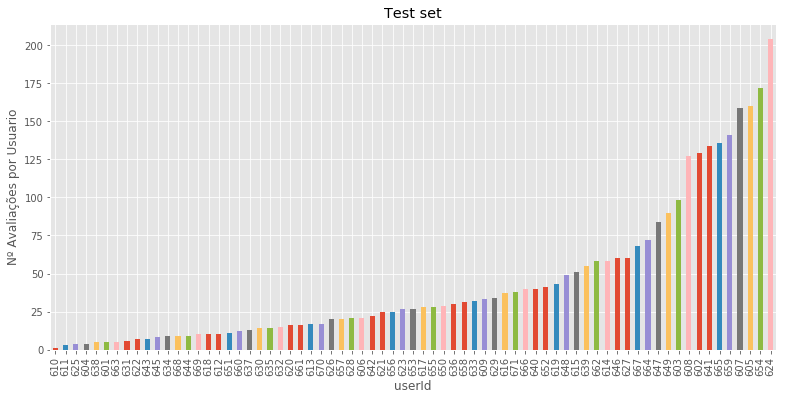

In [792]:
plt.figure(figsize = (13,6))
matrix_test[matrix_test!=0].count().sort_values().plot.bar()
plt.ylabel('Nº Avaliações por Usuario')
plt.title('Test set')
print(matrix_test[matrix_test!=0].count().describe())

# Analisando o número de avaliações realizadas pelos usuarios contidos na matrix_train

In [755]:
matrix_train[matrix_train!=0].describe().iloc[matrix_train[matrix_train!=0].describe().index=='count']

userId,1,2,3,4,5,6,7,8,9,10,...,591,592,593,594,595,596,597,598,599,600
count,8.0,76.0,21.0,83.0,28.0,11.0,78.0,32.0,15.0,19.0,...,12.0,49.0,70.0,34.0,84.0,152.0,98.0,62.0,16.0,1.0


count    600.000000
mean      52.213333
std       64.576192
min        0.000000
25%       15.000000
50%       30.000000
75%       62.250000
max      653.000000
dtype: float64


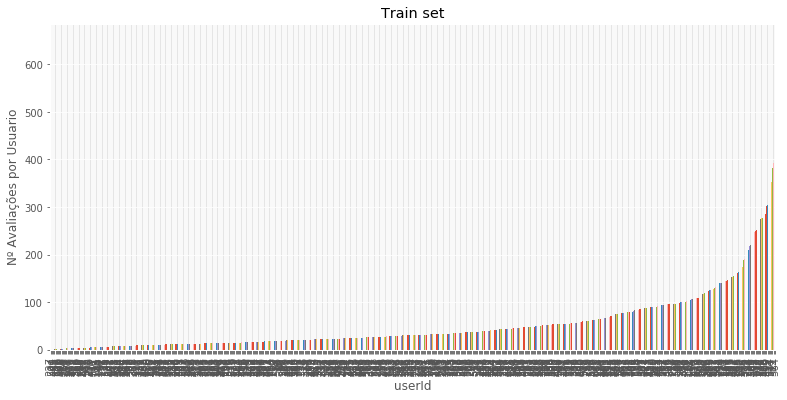

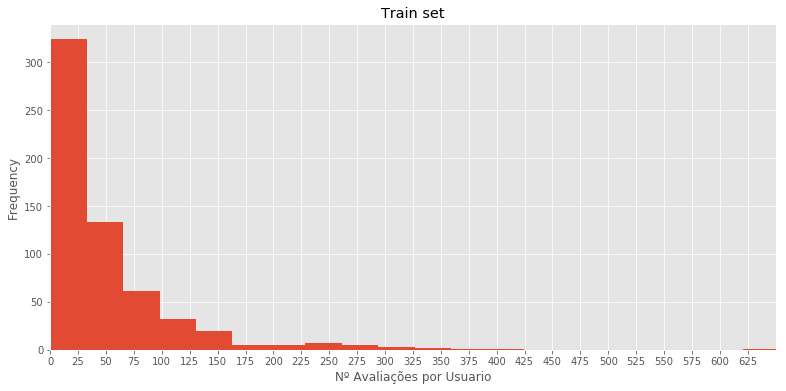

In [795]:
plt.figure(figsize = (13,6))
matrix_train[matrix_train!=0].count().sort_values().plot.bar()
plt.ylabel('Nº Avaliações por Usuario')
plt.title('Train set')

plt.figure(figsize = (13,6))
matrix_train[matrix_train!=0].count().sort_values().plot.hist(bins = 20)
plt.xlabel('Nº Avaliações por Usuario')
plt.xlim((0,650))
plt.xticks(np.arange(0,650,25))
plt.title('Train set')
print(matrix_train[matrix_train!=0].count().describe())

# Utilizando o SVD podemos estabelecer uma relação entre os filmes e os usuarios. O que chamarei de atributos de perfil (dimensão latente).

## Dedução

<p>Seja $M$ a matrix_train, ao fazermos sua decomposição em valores singulares temos:</p>
<p>$M_{mxn} = U_{mxk}S_{kxk}V^T_{kxn}$ onde $U$ e $V^T$ são ortonormais, $S$ uma matriz diagonal de valores positivos e $k$ a dimensão latente</p>

<p> Ao nos atentarmos para a matriz $V^T$ -chamarei perfil_train - para cada coluna dessa matriz temos informações de o quanto o respectivo usuário 'possui' de atributo de perfil. Como a matriz M possui n = 600, temos 600 perfis  de usuários um em cada coluna de $V^T$</p>

In [422]:
u_m,s_m,perfil_train = np.linalg.svd(np.matrix(matrix_train),full_matrices = False)

In [423]:
print(u_m.shape)
s_m = np.diag(s_m)
print(s_m.shape)
print(perfil_train.shape)

(1066, 600)
(600, 600)
(600, 600)


# Visualização dos sigmas

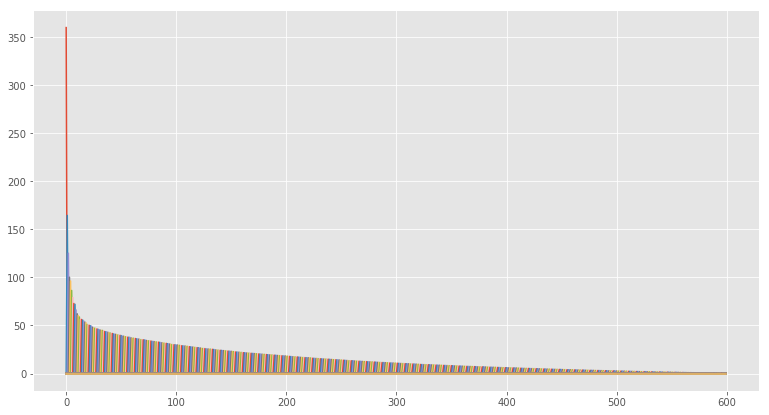

In [800]:
plt.style.use('ggplot')
fig = plt.figure(figsize = (13,7))
plt.plot(s_m)
plt.show()

# Utilizando os resultados dos SVD aplicado na matrix_train, podemos criar a matriz de perfil_test para os 71 usuários da matriz ' matrix_test'.  

In [425]:
perfil_test = (np.matrix(matrix_test).T*u_m*s_m).T

In [426]:
perfil_test.shape

(600, 71)

# Uma vez que temos os dois perfis, podemos concatená-los em uma única matriz - perfis- e calcular a distância entre eles. Irei usar a distancia euclidiana  e para facilidade de implementação, usarei o NearestNeighbors do Scklearn.neighbors.

In [427]:
perfis = np.concatenate((perfil_train,perfil_test),axis = 1)

In [428]:
from sklearn.neighbors import NearestNeighbors
nbrs = NearestNeighbors(n_neighbors=67, algorithm='ball_tree',metric='l2').fit(perfis.T)
distances, indices = nbrs.kneighbors(perfis.T)

## A tabela abaixo mostra os resultados obtidos para todos os 641 (linhas) usuários (perfis) e  os 67  perfis (colunas) mais próximos.

### Obs: O perfil mais próximo de cada usúario e ele mesmo (coluna 0)

In [802]:
pd.DataFrame(indices)

,0,1,2,3,4,5,6,7,8,9,...,57,58,59,60,61,62,63,64,65,66
0,0,241,381,13,38,96,532,538,491,192,...,414,331,447,293,345,281,541,246,77,567
1,1,47,289,5,439,213,13,592,254,93,...,429,209,533,116,369,396,184,230,88,472
2,2,231,200,357,240,214,28,34,375,425,...,9,98,121,104,27,402,434,415,87,8
3,3,75,291,78,14,483,258,401,273,321,...,521,206,431,432,175,144,0,28,248,395
4,4,13,90,395,58,431,397,351,415,217,...,285,212,555,573,528,102,406,456,79,160
5,5,136,228,97,254,16,289,430,1,567,...,473,247,293,584,266,98,544,460,159,71
6,6,32,152,13,54,286,383,99,28,206,...,556,582,464,272,380,193,309,595,133,394
7,7,382,440,262,486,223,485,381,565,428,...,302,131,330,38,55,139,383,484,258,321
8,8,308,13,310,272,550,99,160,529,278,...,149,358,95,161,81,517,118,342,111,334
9,9,58,554,212,421,470,582,259,439,346,...,354,276,388,143,552,369,572,579,547,395


# Iremos agora nos atentarmos apenas para os usuários teste (do 601 até 670)

In [430]:
knn = pd.DataFrame(indices[601:])
knn.set_index(0, inplace = True)
knn.rename_axis('Perfil Test',axis = 0,inplace = True)
knn.rename_axis('67 - Nearest Neighbor',axis = 1,inplace = True)

In [433]:
knn.T

Perfil Test,601,602,603,604,605,606,607,608,609,610,...,661,662,663,664,665,666,667,668,669,670
67 - Nearest Neighbor,,,,,,,,,,,,,,,,,,,,,
1,658,664,600,646,629,623,646,633,563,624,...,638,610,614,602,628,638,634,611,631,614
2,648,663,609,664,612,653,604,643,253,644,...,666,611,602,601,632,661,636,608,656,647
3,664,658,486,607,634,658,663,660,56,603,...,665,630,646,658,638,657,617,630,616,626
4,640,601,415,602,655,602,658,668,85,662,...,618,608,658,648,618,618,642,662,634,654
5,602,614,144,658,667,663,614,630,305,611,...,628,668,664,640,656,626,630,610,612,645
6,663,604,260,601,619,601,601,611,101,600,...,622,627,607,604,622,665,619,643,620,622
7,604,648,387,670,625,664,664,624,546,637,...,626,633,626,663,616,632,608,633,625,657
8,646,640,305,614,636,640,602,662,387,609,...,632,624,601,614,657,628,627,627,667,613
9,626,626,356,663,617,607,670,617,433,633,...,648,660,670,646,652,622,660,660,632,666


## Para cada usuario da matriz $Knn^T$ irei indicar os indices dos filmes avaliados pelos 67 usuários com perfil mais próximo. 

## O universo de possíveis filmes indicados será composto pelos  8000 que foram deixados de lado até agora.

## Serão indicados os filmes que foram avaliados pelos 67 perfis de usuário mais proximos com nota maior ou igual a 3. (varia de 0.5 a 5)

## Exemplo para os usuário 601 e 652:

<p> Calculando todos os filmes que os 67 perfis mais próximos ao perfil do usuário 67 deram nota >=3.</p>

In [914]:
indi_601 = np.concatenate(([matrix[knn.T[601].values][matrix[knn.T[601].values]>=3]
                     [neighbor].dropna().index for neighbor in knn.T[601]]),axis = None)
print(indi_601.shape[0])

7447


In [911]:
indi_652 = np.concatenate(([matrix[knn.T[652].values][matrix[knn.T[652].values]>=3]
                     [neighbor].dropna().index for neighbor in knn.T[652]]),axis = None)
print(indi_652.shape[0])

6179


<p> Eliminando aos indices repitidos, aqueles que diferentes vizinhos avaliaram com nota >=3.</p>

In [922]:
print('Podem ser indicados:',np.unique(indi_601).shape[0],'filmes do universo de 8k')
indi_601 = np.unique(indi_601)

Podem ser indicados: 2864 filmes do universo de 8k


In [923]:
print('Podem ser indicados:',np.unique(indi_652).shape[0],'filmes do universo de 8k')
indi_652 = np.unique(indi_652)

Podem ser indicados: 2469 filmes do universo de 8k


<p> Erros serão avaliados com o auxilio da matriz 'Matrix' que contém todos os dados (9066 filmes e 671  usuários)</p>
<p> Um erro é caracterizado quando o filme indicado já foi assistido e avaliado pelo usuario 601 com nota inferior a 3 ou quando o filme foi assistido e avaliado como >3 mas não foi indicado</p>
<p> OBS: filmes não assistidos receberam por convenção no inicio da aplicação nota 0</p> 

In [924]:
print('Nota  Erros nas recomendações')
print(matrix[601][indi_601[indi_601>1066]][(matrix[601][indi_601[indi_601>1066]]>0)&(matrix[601][indi_601[indi_601>1066]]<3)].value_counts().sort_index())

Nota  Erros nas recomendações
2.0    1
2.5    3
Name: 601, dtype: int64


In [925]:
print('Nota  Erros nas recomendações')
print(matrix[652][indi_652[indi_652>1066]][(matrix[652][indi_652[indi_652>1066]]>0)&(matrix[652][indi_652[indi_652>1066]]<3)].value_counts().sort_index())

Nota  Erros nas recomendações
Series([], Name: 652, dtype: int64)


In [926]:
print('User 601:',matrix[601][1066:].count())
print('User 652:',matrix[652][1066:].count())

User 601: 8000
User 652: 8000


In [929]:
print('Recomendações realizadas 601:',matrix[601][indi_601[indi_601>1066]].value_counts().sum())
print('Recomendações realizadas 652:',matrix[652][indi_652[indi_652>1066]].value_counts().sum())

Recomendações realizadas 601: 2239
Recomendações realizadas 652: 1880


In [930]:
print('Recomendações Avaliadas 601')
print(matrix[601][indi_601[indi_601>1066]][(matrix[601][indi_601[indi_601>1066]]>0)].value_counts().sort_index())
print('Recomendações Avaliadas 652')
print(matrix[652][indi_652[indi_652>1066]][(matrix[652][indi_652[indi_652>1066]]>0)].value_counts().sort_index())

Recomendações Avaliadas 601
2.0     1
2.5     3
3.0     4
3.5     7
4.0    12
4.5     6
5.0     3
Name: 601, dtype: int64
Recomendações Avaliadas 652
3.0     2
3.5    12
4.0    45
4.5     2
5.0    15
Name: 652, dtype: int64


In [931]:
print('Total de Recomendações 652')
print(matrix[601][indi_601[indi_601>1066]][(matrix[601][indi_601[indi_601>1066]]>0)].value_counts().sort_index().sum())
print('Total de Recomendações 652')
print(matrix[652][indi_652[indi_652>1066]][(matrix[652][indi_652[indi_652>1066]]>0)].value_counts().sort_index().sum())

Total de Recomendações 652
36
Total de Recomendações 652
76


In [932]:
print('Avaliações >=3 do usuario 601')
print(matrix[601][1066:][matrix[601][1066:]>=3].value_counts())
print('Avaliações >=3 do usuario 652')
print(matrix[652][1066:][matrix[652][1066:]>=3].value_counts())

Avaliações >=3 do usuario 601
4.0    13
3.5     9
4.5     6
3.0     5
5.0     3
Name: 601, dtype: int64
Avaliações >=3 do usuario 652
4.0    113
5.0     70
3.5     18
4.5     13
3.0     11
Name: 652, dtype: int64


In [935]:
print('Erro 601:',(matrix[601][indi_601[indi_601>1066]][(matrix[601][indi_601[indi_601>1066]]>0)&((matrix[601][indi_601[indi_601>1066]]<3))].value_counts().sum()+)
     /matrix[601][1066:][matrix[601][1066:]>=3].value_counts().sum())
print('Erro 652:',matrix[652][indi_652[indi_652>1066]][(matrix[652][indi_652[indi_652>1066]]>0)&((matrix[652][indi_652[indi_652>1066]]<3))].value_counts().sum()
     /matrix[652][1066:][matrix[652][1066:]>=3].value_counts().sum())

Erro 601: 0.1111111111111111
Erro 652: 0.0


# Aplicando para todos os usuarios da matrix_test

In [861]:
p_erros = []
recomendacoes = []
total_=[]
for user in knn.T.columns:
    ind = np.concatenate(([matrix[knn.T[user].values][matrix[knn.T[user].values]>=3]
                     [neighbor].dropna().index for neighbor in knn.T[user]]),axis = None)
    
    ind = np.unique(ind)
    recomendacoes += [ind[ind>1066]]
    erros = matrix[user][ind[ind>1066]][(matrix[user][ind[ind>1066]]>0)&(matrix[user][ind[ind>1066]]<3)].value_counts().sort_index().sum()
    total = matrix[user][1066:][matrix[user]>=3].value_counts().sort_index().sum()
    total_ +=[total]
    p_erros+=[erros/total]

/home/alan/.local/lib/python3.6/site-packages/ipykernel_launcher.py:13: RuntimeWarning: invalid value encountered in long_scalars
  del sys.path[0]


In [862]:
rec = pd.DataFrame(index = knn.T.columns)

In [863]:
rec['MovieId Recomendados'] = recomendacoes
rec['Total de Recomendações'] = rec['MovieId Recomendados'].apply(lambda x: len(x))
rec['Recomendações testadas'] = total_
rec['Erro'] = np.array(p_erros)
rec

,MovieId Recomendados,Total de Recomendações,Recomendações testadas,Erro
Perfil Test,,,,
601,"[1067, 1073, 1079, 1080, 1084, 1088, 1089, 109...",2239,36,0.111111
602,"[1067, 1073, 1079, 1080, 1084, 1088, 1089, 109...",2243,0,NaN
603,"[1067, 1079, 1083, 1084, 1085, 1088, 1089, 109...",2675,16,0.000000
604,"[1067, 1073, 1079, 1080, 1084, 1088, 1089, 109...",2239,9,0.777778
605,"[1067, 1079, 1084, 1088, 1090, 1092, 1093, 109...",1978,192,0.234375
606,"[1067, 1073, 1079, 1080, 1084, 1088, 1089, 109...",2236,37,0.054054
607,"[1067, 1073, 1079, 1080, 1084, 1088, 1089, 109...",2217,248,0.068548
608,"[1067, 1076, 1077, 1079, 1080, 1084, 1088, 108...",2320,161,0.031056
609,"[1067, 1079, 1083, 1084, 1085, 1088, 1089, 109...",2814,25,0.760000


In [882]:
rec.describe()

,Total de Recomendações,Recomendações testadas,Erro
count,70.000000,70.000000,58.000000
mean,2193.557143,70.457143,0.163855
std,227.831850,133.645832,0.227207
min,1695.000000,0.000000,0.000000
25%,2083.250000,8.000000,0.030178
50%,2191.500000,22.500000,0.070437
75%,2242.500000,71.000000,0.195812
max,3098.000000,868.000000,1.000000


# Essa abordagem permitiu avaliarmos as recomendações de 58 dos 70 usuários do conjunto teste

(0, 1)

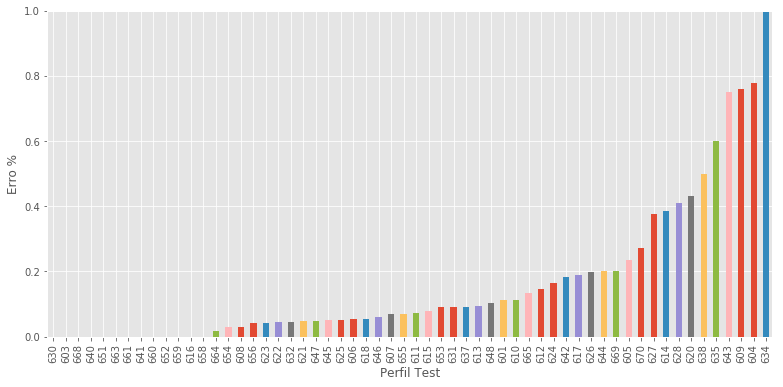

In [870]:
rec.Erro.dropna().sort_values().plot.bar(figsize=(13,6))
plt.ylabel('Erro %')
plt.ylim((0,1))

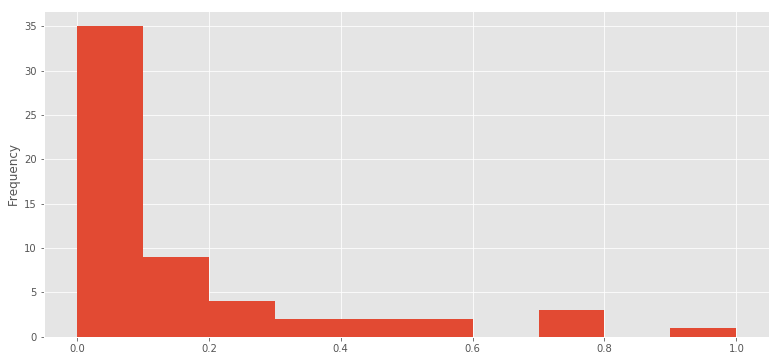

In [871]:
rec.Erro.dropna().plot.hist(figsize=(13,6))

# Erro nos extremos

In [908]:
rec[rec.Erro==1]

,MovieId Recomendados,Total de Recomendações,Recomendações testadas,Erro
Perfil Test,,,,
634,"[1067, 1073, 1076, 1077, 1079, 1080, 1084, 108...",2346,6,1.0


In [909]:
rec[rec.Erro==0]

,MovieId Recomendados,Total de Recomendações,Recomendações testadas,Erro
Perfil Test,,,,
603,"[1067, 1079, 1083, 1084, 1085, 1088, 1089, 109...",2675,16,0.0
616,"[1067, 1073, 1079, 1080, 1084, 1088, 1089, 109...",2138,3,0.0
630,"[1079, 1084, 1088, 1089, 1090, 1092, 1095, 109...",2245,9,0.0
640,"[1067, 1073, 1079, 1080, 1084, 1088, 1089, 109...",2241,9,0.0
641,"[1067, 1073, 1079, 1080, 1084, 1088, 1089, 109...",1884,6,0.0
651,"[1067, 1073, 1079, 1080, 1084, 1088, 1089, 109...",2200,9,0.0
652,"[1067, 1073, 1079, 1080, 1084, 1088, 1089, 109...",1880,225,0.0
658,"[1067, 1073, 1079, 1080, 1084, 1088, 1089, 109...",2241,29,0.0
659,"[1067, 1073, 1079, 1080, 1084, 1088, 1089, 109...",1984,1,0.0


In [910]:
rec[rec.Erro==0].describe()

,Total de Recomendações,Recomendações testadas,Erro
count,13.000000,13.000000,13.0
mean,2147.153846,33.307692,0.0
std,215.453725,61.078344,0.0
min,1880.000000,1.000000,0.0
25%,1984.000000,9.000000,0.0
50%,2200.000000,9.000000,0.0
75%,2241.000000,21.000000,0.0
max,2675.000000,225.000000,0.0
